# Data and Web Mining
## Dimensionality Reduction

#### Prof. Claudio Lucchese


## PCA: Principal Component Analysis

### Dimensionality reduction by using the direction of maximum variance



PCA finds the orthogonal directions of maximum variance of the given data. It can be thought as a transformation a new coordinate system, where the first coordinate (the first principal component) identifies the projection of greatest variance, the second coordinate the second greatest variance, etc. etc.

Mathematically, the principal components are the eigenvectors of the covariance matrix.

## Data Preprocessing

Before running PCA, it is required to standardize the features of our data.
This normalizes the scale of the different features.

Recall, here we have #istances x # features

 - Step 1. Zero out the mean of the data

 - Step 2. Rescale each coordinate to have unit variance

In [1]:
from sklearn.datasets import make_classification

# Draw some random data in a 2-dimensional space
n_samples = 100
X, Y = make_classification(n_samples=n_samples, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_classes=1, n_clusters_per_class=1,
                           random_state=5)


In [2]:
# manual standardization
X = X - X.mean(axis=0)
X = X / X.std(axis=0)
# try using the StandardScaler as an exercise

In [3]:
# check
X.mean(axis=0)

array([8.65973959e-17, 1.83186799e-16])

In [4]:
# check
X.std(axis=0)

array([1., 1.])

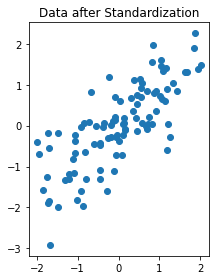

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True) 

ax.plot( X[:,0], X[:,1], 'o' )
ax.set_title("Data after Standardization")
ax.set_aspect('equal')

In [6]:
from sklearn.decomposition import PCA

pca = PCA() # this will create as many components 
            # as the number of features
pca.fit(X)  # note this matrix is [samples x dimentions]
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

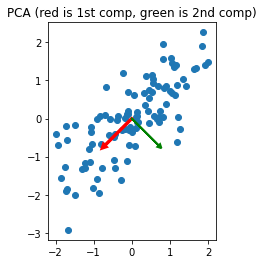

In [7]:
fig, ax = plt.subplots()

ax.plot( X[:,0], X[:,1], 'o' )

#   from x,y  ---to-------->     x,y
ax.arrow(0,0, pca.components_[0,0], pca.components_[0,1], 
          head_width=0.1, head_length=0.1, fc='r', ec='r', lw=3, zorder=2)

ax.arrow(0,0, pca.components_[1,0], pca.components_[1,1], 
          head_width=0.1, head_length=0.1, fc='g', ec='g', lw=2, zorder=2)

ax.set_title("PCA (red is 1st comp, green is 2nd comp)")
ax.set_aspect('equal')

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
pca.components_

array([[-0.70710678, -0.70710678]])

In [9]:
# project data onto the selected components
X_proj = pca.transform(X)

print ( X_proj.shape )
print ( X_proj[:10] )

(100, 1)
[[ 1.68832282]
 [-1.05658337]
 [-0.44943098]
 [ 2.01697441]
 [ 1.36662475]
 [ 0.24783144]
 [-1.72274358]
 [-1.17130471]
 [-0.40592384]
 [ 1.35316568]]


At this point `X_proj` contains the coordinates of the points along the first principal component.

We can get the 2-D coordinates of those points placed along the first principal component direction as follows.

In [10]:
# move data back to the original space
X_approx = pca.inverse_transform(X_proj)
X_approx.shape

(100, 2)

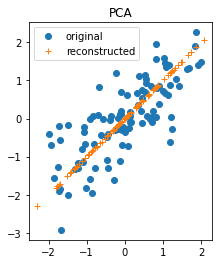

In [11]:
fig, ax = plt.subplots()

ax.plot( X[:,0], X[:,1], 'o', label="original" )

ax.plot( X_approx[:,0], X_approx[:,1], '+', label="reconstructed" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend();

### PCA versus Regression

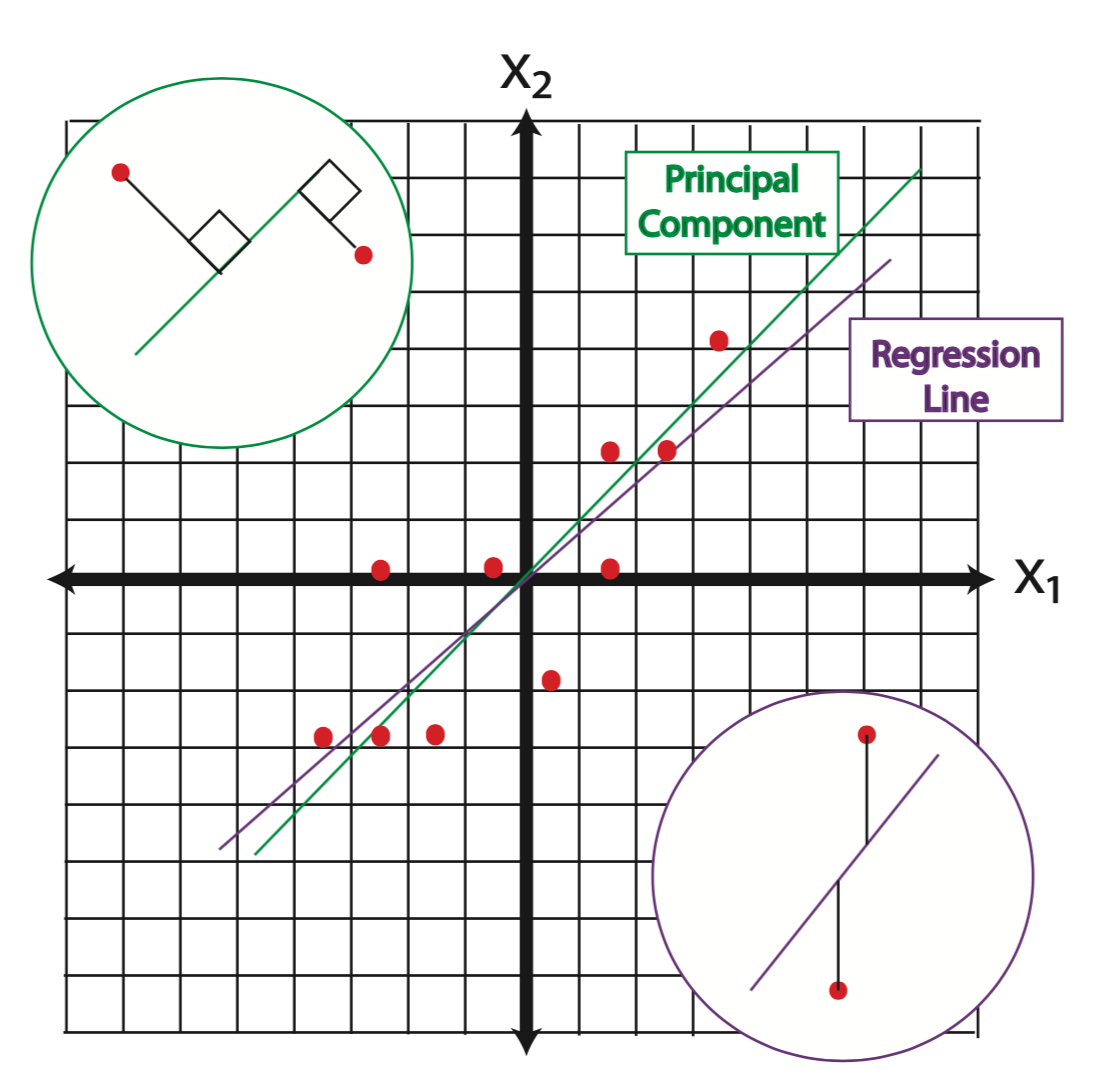

## Visualize multi-dimensional data

Iris dataset

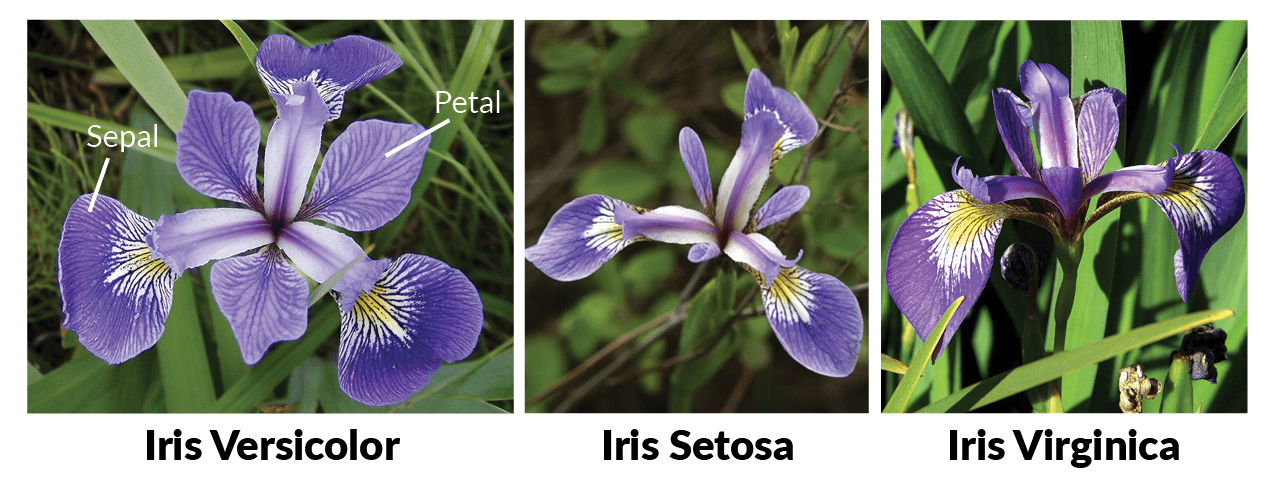

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

In [13]:
X.shape

(150, 4)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

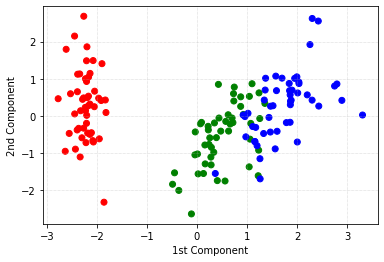

In [17]:
fig, ax = plt.subplots()

colors = np.array(['r','g','b'])

# scatter is similar to plot, additionally a color per point is provided
ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

Coefficients of principal components are related to the importance of a feature for that component.

In [18]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## Breast cancer dataset

In [19]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

X.shape

(569, 30)

In [20]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### Let's plot the first 2 dimensions of such data. 

Classes are not nicely separated.

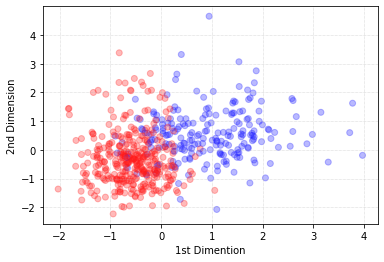

In [21]:
fig, ax = plt.subplots()

colors = np.array([(0.1,0.1,1.0,0.3),(1.0,0.1,0.1,0.3)])

# scatter is ismilar to plot, additionally a color per point is provided
ax.scatter(X[:,0],X[:,1], c=colors[y])

ax.set_xlabel("1st Dimention")
ax.set_ylabel("2nd Dimension")
ax.grid(linestyle=':', linewidth=.5)

### Let's use PCA

To visualize the dataset projected on the first two principal components.

In [22]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

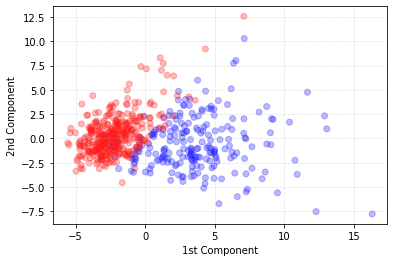

In [23]:
fig, ax = plt.subplots()

colors = np.array([(0.1,0.1,1.0,0.3),(1.0,0.1,0.1,0.3)])

# scatter is ismilar to plot, additionally a color per point is provided
ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

## Wine quality datasets

In [24]:
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
y = wine.target

# standardize
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

X.shape

(178, 13)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [27]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

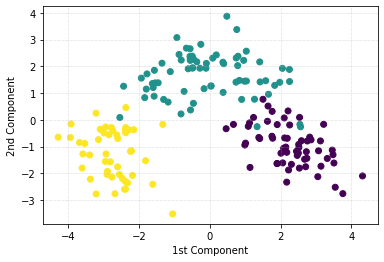

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_2[:,0],X_2[:,1], c=y)

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.grid(linestyle=':', linewidth=.5)

## Image Compression

In [29]:
image = datasets.load_sample_image("flower.jpg")

In [30]:
image.shape

(427, 640, 3)

In [31]:
image

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [32]:
# make it a matrix of floats for better visualization
image = image/255

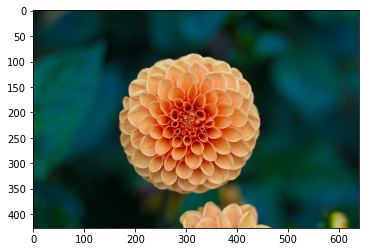

In [33]:
fig, ax = plt.subplots()

ax.imshow(image);

In [34]:
# reshape into a 2D matrix
#                             # rows       , auto
image_flat = image.reshape( (image.shape[0],-1))
print (image_flat.shape)

(427, 1920)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


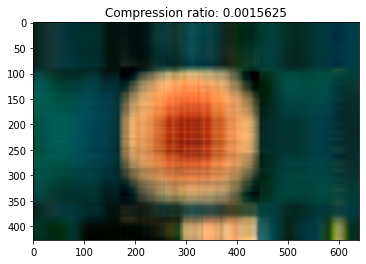

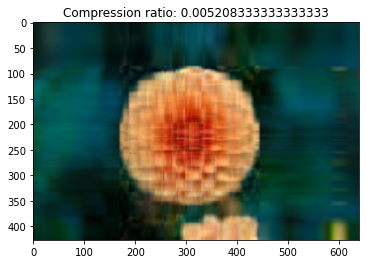

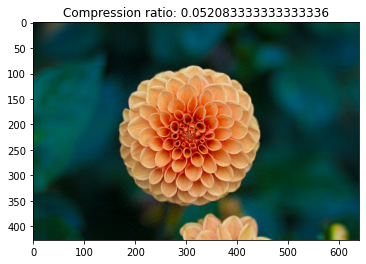

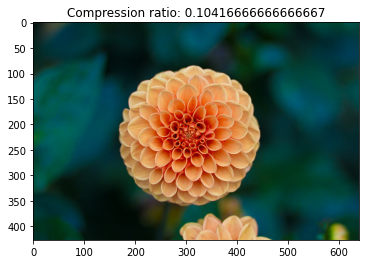

In [35]:
for n_c in [3,10,100,200]:
    pca = PCA(n_components=n_c)
    
    X_reduced = pca.fit_transform(image_flat)
    X_reconstructed = pca.inverse_transform(X_reduced)
    
    img_r = X_reconstructed.reshape(image.shape)
    
    fig, ax = plt.subplots()
    ax.imshow(img_r)
    compression = np.prod(X_reduced.shape) / np.prod(image.shape)
    ax.set_title("Compression ratio: " + str(compression))